In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio


import math


In [23]:
# df = pd.read_csv("gtzan/features_3_sec.csv")
# df.head()

In [24]:
audio_recording="gtzan/genres_original/blues/blues.00001.wav"
data,sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [25]:
librosa.load(audio_recording,sr=45600)

(array([ 0.00339674,  0.0046504 ,  0.00439255, ..., -0.18784666,
        -0.14298192, -0.06655598], dtype=float32),
 45600)

In [26]:
import IPython
IPython.display.Audio(data,rate=sr)

C:\Users\Dude\AppData\Local\Temp\ipykernel_6928\3333955140.py:2: FutureWarning: Pass y=[ 0.00341797  0.00430298  0.00137329 ... -0.11953735 -0.17495728
 -0.15118408] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]


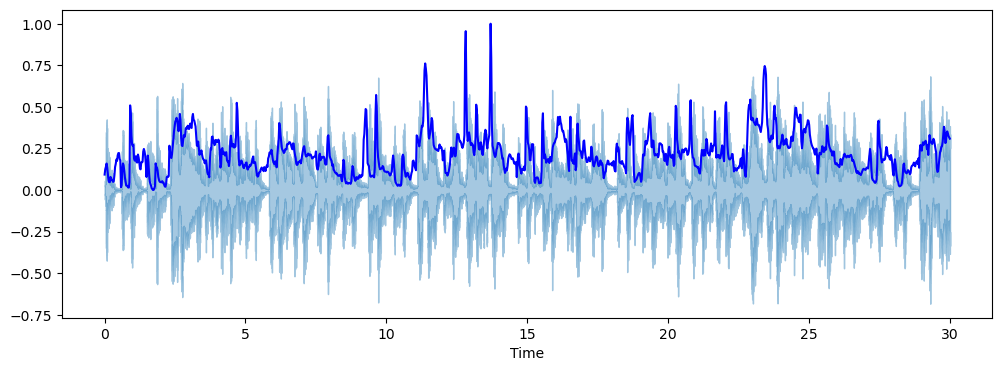

In [27]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]
spectral_centroids.shape

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
y_harmonic, y_percussive = librosa.effects.hpss(data)
# Нормализация спектрального центроида для визуализации
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')


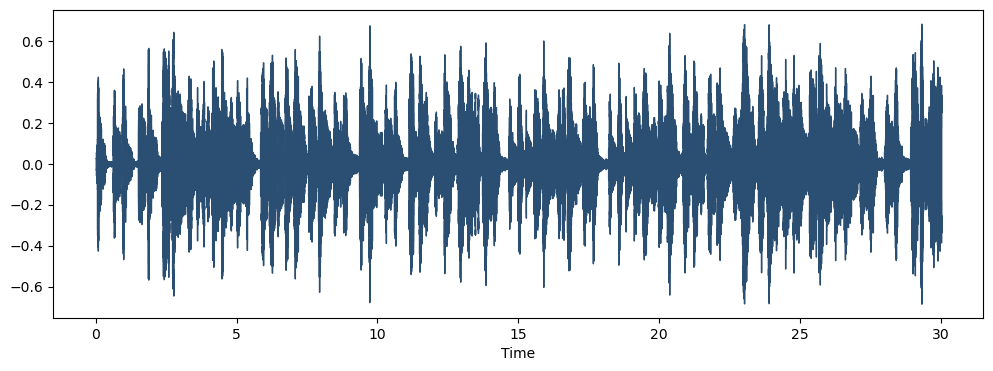

In [28]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data,color="#2B4F72")
plt.show()

e:\anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


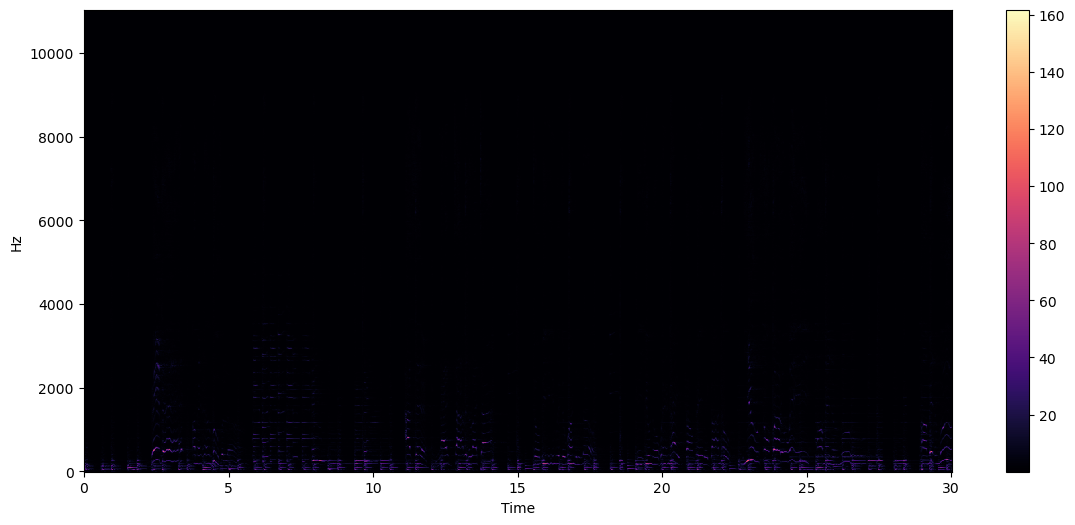

In [29]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

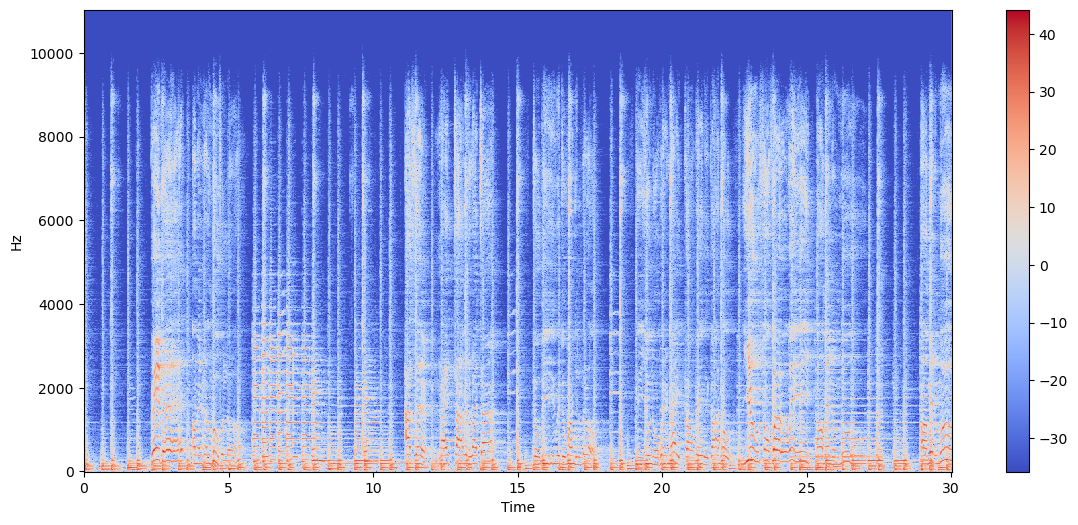

In [30]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

C:\Users\Dude\AppData\Local\Temp\ipykernel_6928\742313470.py:1: FutureWarning: Pass y=[ 0.01341797  0.01430298  0.01137329 ... -0.10953736 -0.16495727
 -0.14118408] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]


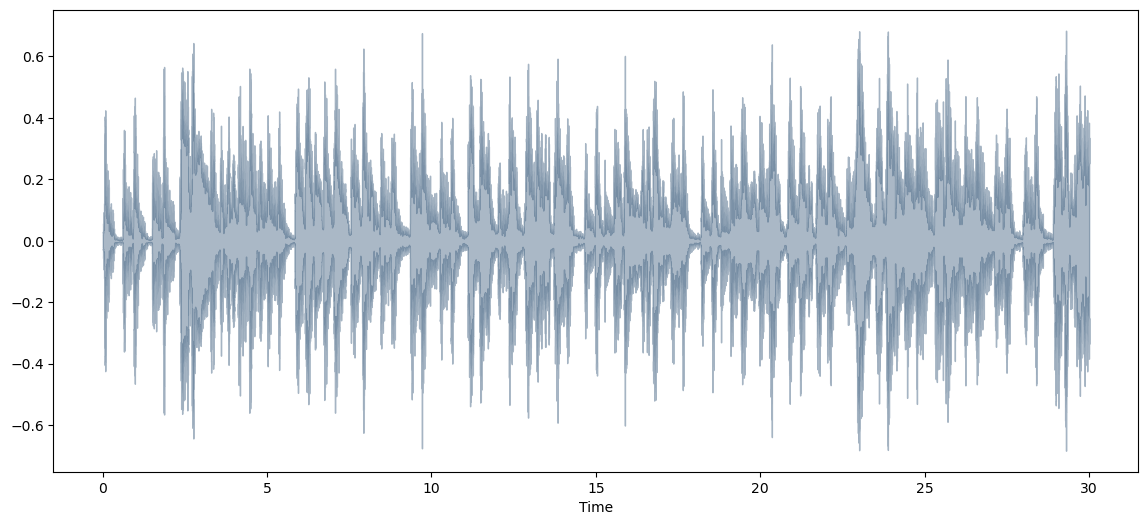

In [31]:
spectral_rolloff=librosa.feature.spectral_rolloff(data+0.01,sr=sr)[0]
plt.figure(figsize=(14,6))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color="#2B4F72")

C:\Users\Dude\AppData\Local\Temp\ipykernel_6928\1146563947.py:2: FutureWarning: Pass y=[ 0.00341797  0.00430298  0.00137329 ... -0.11953735 -0.17495728
 -0.15118408] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data,sr=sr)


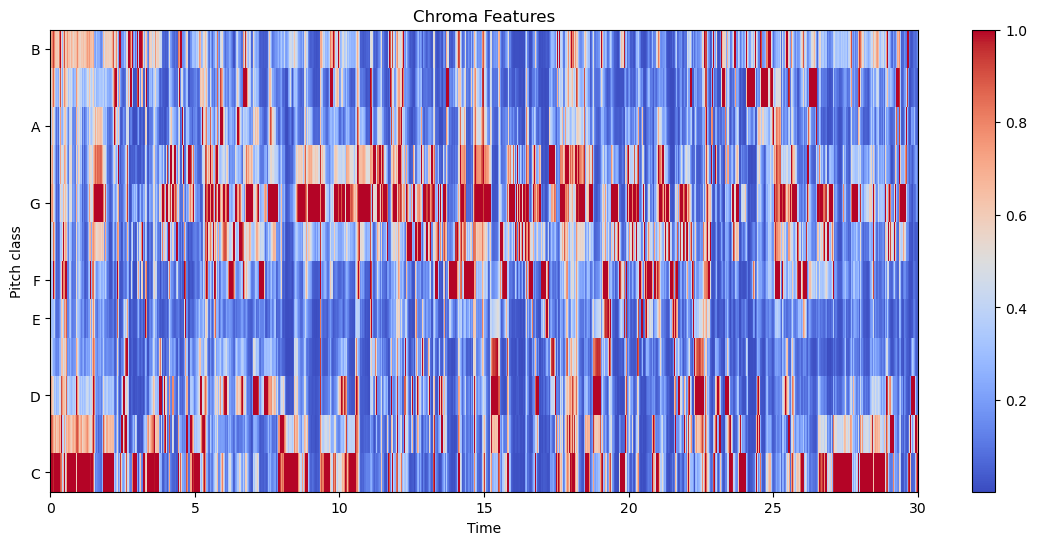

In [32]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(data,sr=sr)
plt.figure(figsize=(14,6))
lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

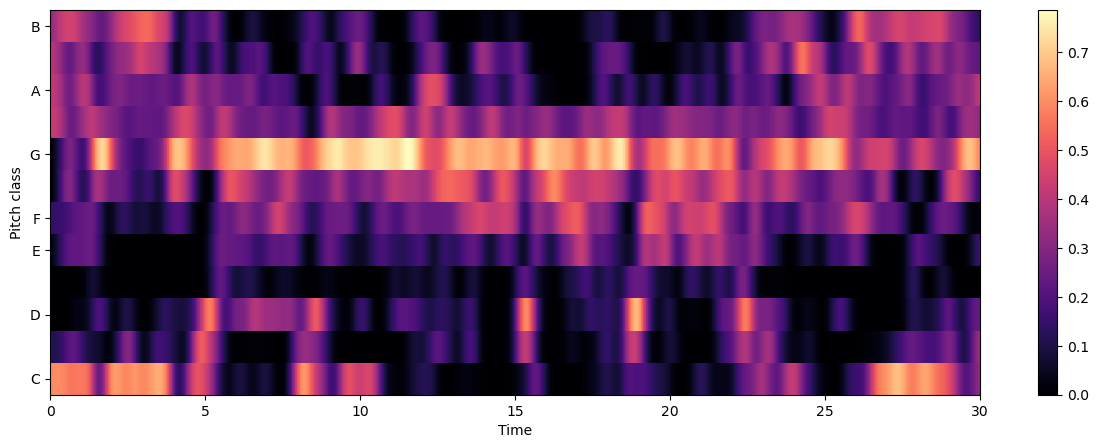

In [33]:
#Chroma Energy Normalized (CENS)
chroma=librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
plt.colorbar()

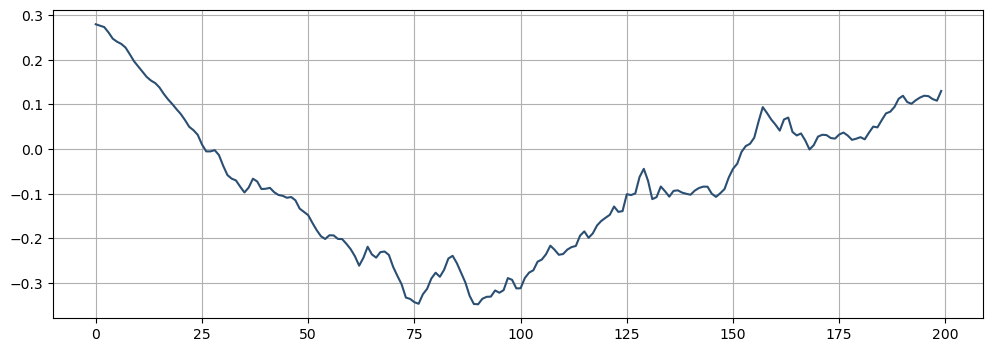

In [34]:
start=1000
end=1200
plt.figure(figsize=(12,4))
plt.plot(data[start:end],color="#2B4F72")
plt.grid()

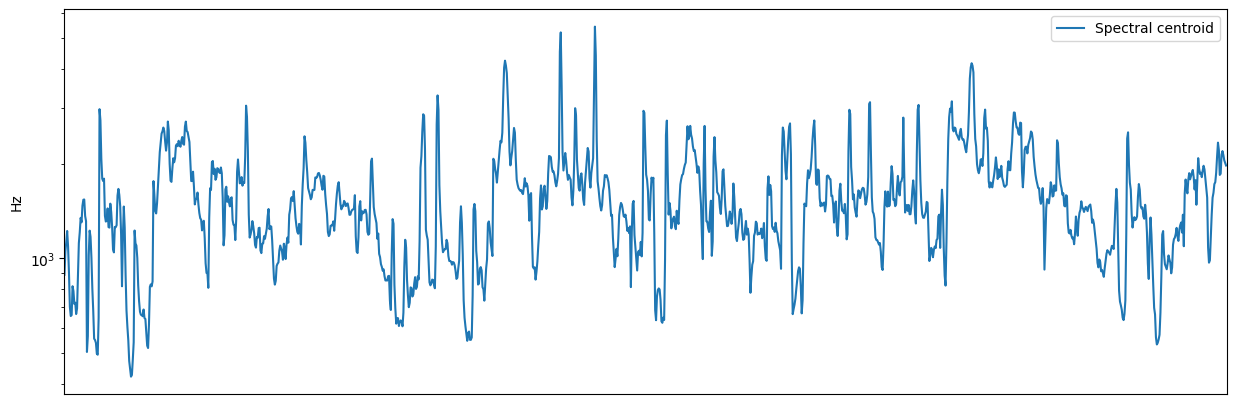

In [35]:
# Spectral Centroid
cent = librosa.feature.spectral_centroid(y=data, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

Text(0.5, 1.0, 'MFCC')

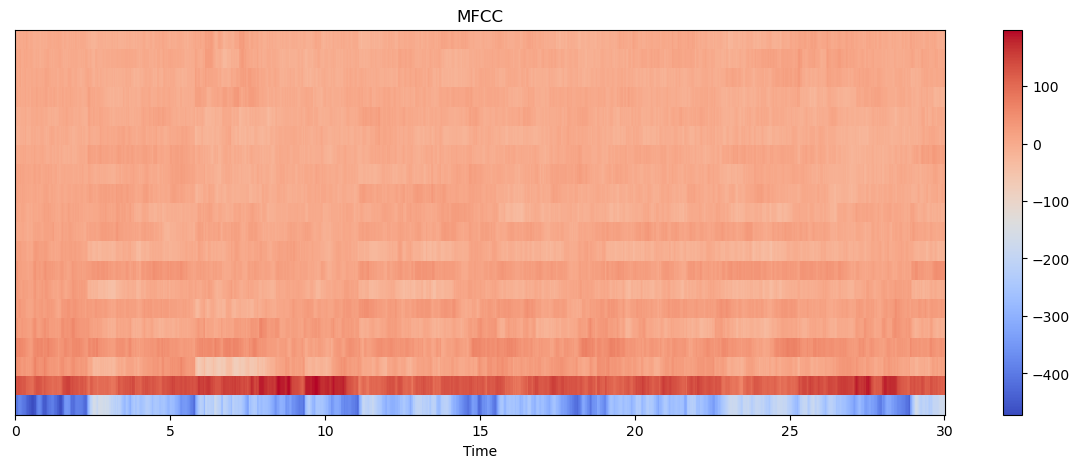

In [36]:
# Calculate MFCCs

mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')